# 1. Xử lý Missing Data

In [3]:
import pandas as pd
import numpy as np

In [4]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])

In [5]:
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [6]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [7]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

In [9]:
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])

In [10]:
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [11]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [12]:
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [13]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [14]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA], [NA, NA, NA], [NA, 6.5, 3.]])

In [15]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [16]:
cleaned = data.dropna()

In [17]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [18]:
cleaned

,0,1,2
0,1.0,6.5,3.0


In [19]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


Loại bỏ dòng có tất cả là NA

In [21]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [22]:
data[4] = NA

In [23]:
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [24]:
data.dropna(how='all', axis=1)

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [25]:
df = pd.DataFrame(np.random.randn(7, 3))

In [26]:
df.iloc[:4, 1] = NA

In [27]:
df.iloc[:2, 2] = NA

In [28]:
df

,0,1,2
0,-0.968934,NaN,NaN
1,-0.521492,NaN,NaN
2,-1.095113,NaN,-0.810547
3,0.976151,NaN,-0.213053
4,0.072140,0.001733,-0.135011
5,0.438125,1.271525,0.023616
6,-0.096022,0.448720,1.518267


In [29]:
df.dropna()

,0,1,2
4,0.072140,0.001733,-0.135011
5,0.438125,1.271525,0.023616
6,-0.096022,0.448720,1.518267


In [31]:
df

,0,1,2
0,-0.968934,NaN,NaN
1,-0.521492,NaN,NaN
2,-1.095113,NaN,-0.810547
3,0.976151,NaN,-0.213053
4,0.072140,0.001733,-0.135011
5,0.438125,1.271525,0.023616
6,-0.096022,0.448720,1.518267


In [32]:
df.dropna(thresh=2)

,0,1,2
2,-1.095113,NaN,-0.810547
3,0.976151,NaN,-0.213053
4,0.072140,0.001733,-0.135011
5,0.438125,1.271525,0.023616
6,-0.096022,0.448720,1.518267


In [34]:
df.dropna(thresh=1)

,0,1,2
0,-0.968934,NaN,NaN
1,-0.521492,NaN,NaN
2,-1.095113,NaN,-0.810547
3,0.976151,NaN,-0.213053
4,0.072140,0.001733,-0.135011
5,0.438125,1.271525,0.023616
6,-0.096022,0.448720,1.518267


In [35]:
df.dropna(thresh=3)

,0,1,2
4,0.072140,0.001733,-0.135011
5,0.438125,1.271525,0.023616
6,-0.096022,0.448720,1.518267


# Filling In Missing Data

In [36]:
df.fillna(0)

,0,1,2
0,-0.968934,0.000000,0.000000
1,-0.521492,0.000000,0.000000
2,-1.095113,0.000000,-0.810547
3,0.976151,0.000000,-0.213053
4,0.072140,0.001733,-0.135011
5,0.438125,1.271525,0.023616
6,-0.096022,0.448720,1.518267


In [37]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-0.968934,0.500000,0.000000
1,-0.521492,0.500000,0.000000
2,-1.095113,0.500000,-0.810547
3,0.976151,0.500000,-0.213053
4,0.072140,0.001733,-0.135011
5,0.438125,1.271525,0.023616
6,-0.096022,0.448720,1.518267


In [38]:
df

,0,1,2
0,-0.968934,NaN,NaN
1,-0.521492,NaN,NaN
2,-1.095113,NaN,-0.810547
3,0.976151,NaN,-0.213053
4,0.072140,0.001733,-0.135011
5,0.438125,1.271525,0.023616
6,-0.096022,0.448720,1.518267


In [39]:
_ = df.fillna(0, inplace=True)

In [41]:
df

,0,1,2
0,-0.968934,0.000000,0.000000
1,-0.521492,0.000000,0.000000
2,-1.095113,0.000000,-0.810547
3,0.976151,0.000000,-0.213053
4,0.072140,0.001733,-0.135011
5,0.438125,1.271525,0.023616
6,-0.096022,0.448720,1.518267


In [42]:
df = pd.DataFrame(np.random.randn(6, 3))

In [44]:
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,0.966869,0.868137,-0.826046
1,0.749929,0.156663,0.692842
2,-1.908394,NaN,0.085285
3,0.197908,NaN,0.089717
4,0.524834,NaN,NaN
5,0.494021,NaN,NaN


In [45]:
df.fillna(method='ffill')

,0,1,2
0,0.966869,0.868137,-0.826046
1,0.749929,0.156663,0.692842
2,-1.908394,0.156663,0.085285
3,0.197908,0.156663,0.089717
4,0.524834,0.156663,0.089717
5,0.494021,0.156663,0.089717


In [47]:
df.fillna(method='ffill', limit=1)

,0,1,2
0,0.966869,0.868137,-0.826046
1,0.749929,0.156663,0.692842
2,-1.908394,0.156663,0.085285
3,0.197908,NaN,0.089717
4,0.524834,NaN,0.089717
5,0.494021,NaN,NaN


In [48]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,0.966869,0.868137,-0.826046
1,0.749929,0.156663,0.692842
2,-1.908394,0.156663,0.085285
3,0.197908,0.156663,0.089717
4,0.524834,NaN,0.089717
5,0.494021,NaN,0.089717


### Mỗi cột + 2 fills

In [49]:
df.fillna(method='ffill', limit=3)

,0,1,2
0,0.966869,0.868137,-0.826046
1,0.749929,0.156663,0.692842
2,-1.908394,0.156663,0.085285
3,0.197908,0.156663,0.089717
4,0.524834,0.156663,0.089717
5,0.494021,NaN,0.089717


In [50]:
data = pd.Series([1., NA, 3.5, NA, 7])

In [51]:
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

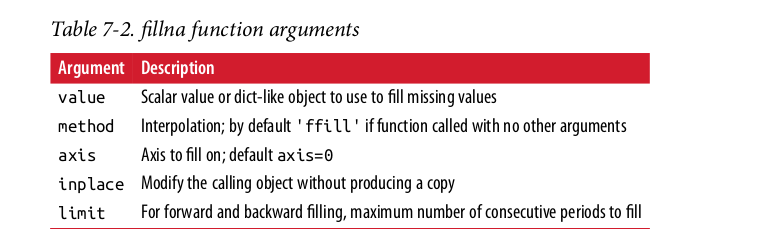

# 2 Data Transformation

## 2.1. Removing Duplicates

In [52]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'], 'k2': [1, 1, 2, 3, 3, 4, 4]})

In [53]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [54]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [55]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
